In [10]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

from matplotlib.cm import rainbow
import wsindy
from scipy.integrate import solve_ivp
from mpl_toolkits import mplot3d
import wsindy
import ODE_examples

In [11]:
ode_num = 5    # select ODE system from the list ode_names
tol_ode = 1e-15                    # ode45 tolerance (abs and rel) for generating data
num_runs = 1                       
noise_ratio = 0              #set signal-to-noise ratio(L2 sense)
np.random.seed(42)                 #reproducibility 
useFD_SINDy = 1                    #SINDy finite difference differentiation order, if 0 uses TVdiff
use_preset_params = True           #Use parameters specified in gen_data

#ode params
ode_names = ['Linear','Logistic_Growth','Van_der_Pol','Duffing','Lotka_Volterra','Lorenz']
ode_name = ode_names[ode_num]

if ode_name == 'Linear':
    ode_params = np.array([[[-0.1, 2], [-2, -0.1]]]) 
    x0 = np.array([3,0]).T
    t_span = np.array([0, 15])
    t_eval = np.linspace(0, 15, 1501)
elif ode_name == 'Logistic_Growth':
    ode_params = np.array([2])
    x0 = np.array([0.01]).T
    t_span = np.array([0, 10])
    t_eval = np.arange(0, 10, 0.005)
elif ode_name == 'Van_der_Pol':
    dt = 0.01
    ode_params = np.array([4])
    x0 = np.array([0,1]).T
    t_span = np.array([0, 30])
    t_eval = np.arange(0, 30, dt)
elif ode_name == 'Duffing':
    mu = 0.2
    ode_params =  np.array([mu, mu**2/4*5,1])
    x0 = np.array([0,2]).T
    t_eval = np.arange(0, 30, 0.01)
    t_span = np.array([0,30])
elif ode_name == 'Lotka_Volterra':
    alpha= 2/3
    beta = 4/3
    ode_params = np.array([alpha, beta,1, 1])
    x0 = np.array([10,10]).T
    t_span = np.array([0, 200])
    t_eval = np.arange(0, 200, 0.02)
elif ode_name == 'Lorenz':
    ode_params = np.array([10, 8/3,27])
    t_span = np.array([0.001, 10])
    t_eval = np.linspace(0.001, 10, 5000)
    x0 = np.array([-8 ,7 ,28]).T
    #x0 = [rand(2,1)*30-15;rand*30+10]

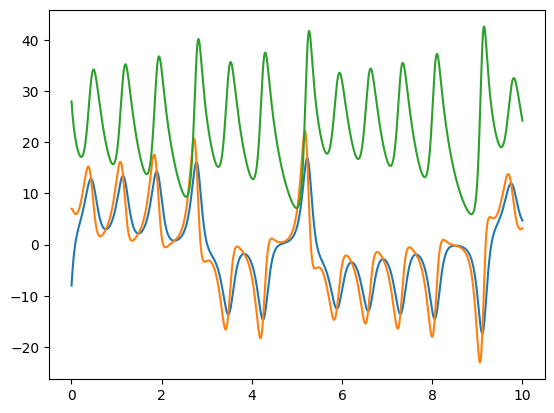

In [12]:
if use_preset_params == False:
    polys = np.arange(0, 6, 1)  # polynomial degrees to include
    trigs = []  # trig frequencies to include
    gamma = 10**(-np.inf)  # Tikhonov regularization
    lambda_mult = 4  # Sparsity param = min_{w*_i~=0}|w*_i|/lambda_mult
    scale_Theta = 0  # Normalize columns of Theta (needs work)

    # set WSINDy params
    tau_p = 9                      # sets poly degree p = -tau_p. If tau_p<0, instead sets p by enforcing that test function has value 10^-tau_p at penultimate support point
    r_whm = 30                     # test function whm - sets support length
    tau = 0                        # toggle between uniform and adapted grid
    # number of test functions per coordinate (exact for uniform, approximate for adaptive)
    K = 50
    p = 2
    s = 16                 # (parameters for adaptive grid)
    useGLS = False                # toggle use generalized least squares
else:
    polys, trigs, gamma, lambda_mult, scale_Theta, tau, tau_p, K, p, s, useGLS, r_whm = ODE_examples.setParam(
        ode_name, use_preset_params)
    weights, t, x, rhs = ODE_examples.simODE(
        x0, t_span, t_eval, tol_ode, ode_name, ode_params, noise_ratio)

plt.plot(t,x)

In [13]:
support = 80; overlap = 0.99
w, true_weights, ts_grids , mats = wsindy.getWSindyUniform(
    x, t, weights, polys, trigs, lambda_mult, scale_Theta, gamma, support, overlap, useGLS)

print("Log10 norm relative error:", np.log10(np.linalg.norm(true_weights - w)/np.linalg.norm(true_weights)))


support and overlap 80 77
length grid 1640
Log10 norm relative error: -6.9936277270960225


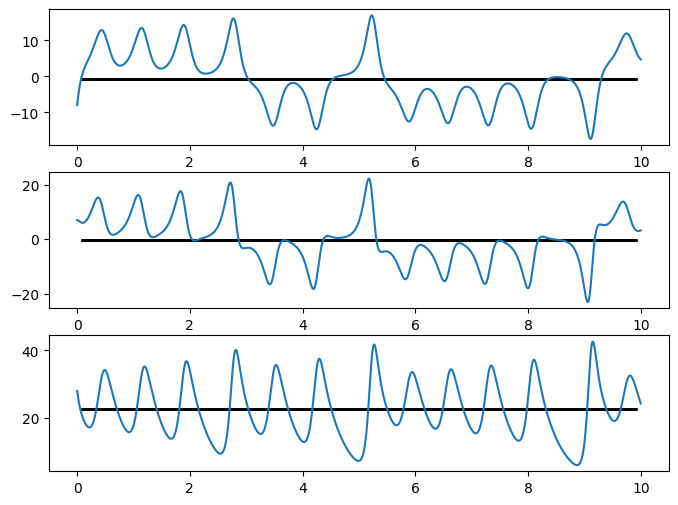

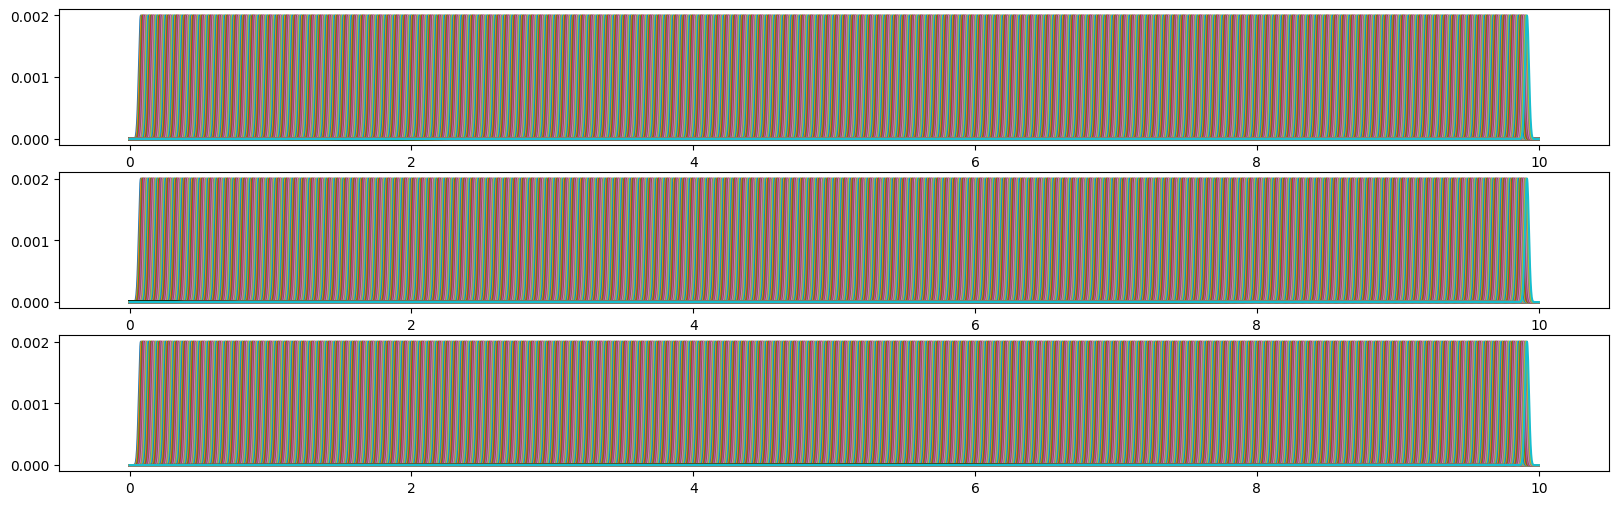

In [15]:
fig = plt.figure(figsize=(8, 6))
c = 1
n = x.shape[1]

for d in range(n):
    plt.subplot(n, 1, c)
    temp = np.floor(np.mean(ts_grids[d], 1)).astype(int)
    plt.scatter(np.take(t, temp), np.mean(
        x[:, d])*np.ones(ts_grids[d].shape)[:, 0], s=1, color='black')
    plt.plot(t, x[:, d])
    c = c + 1

fig = plt.figure(figsize=(20, 6))
c = 1
for d in range(n):
    plt.subplot(n, 1, c)
    plt.plot(t, mats[d][0].T)
    c = c + 1



In [16]:
tau = 1
w, true_weights, ts_grids , mats = wsindy.getWsindyAdaptive(x, t, weights, polys, trigs, lambda_mult, scale_Theta, gamma, tau_p, r_whm, useGLS, s, K, p, tau)
print("Log10 norm relative error:", np.log10(np.linalg.norm(true_weights - w)/np.linalg.norm(true_weights)))


length grid 100
length grid 100
length grid 100
Log10 norm relative error: -6.849455500717563


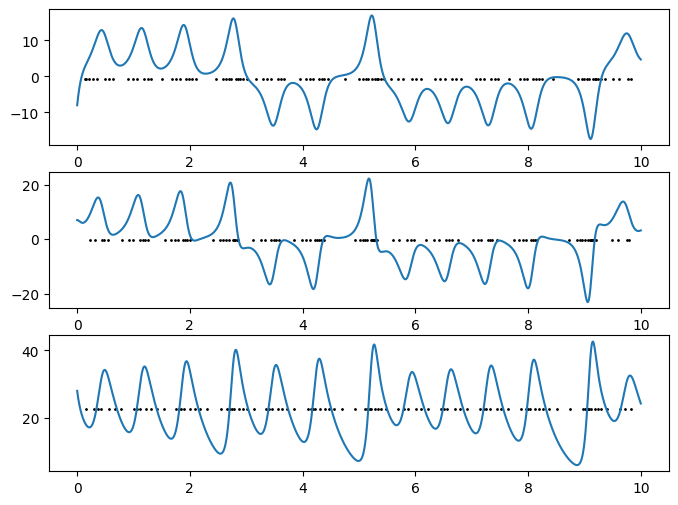

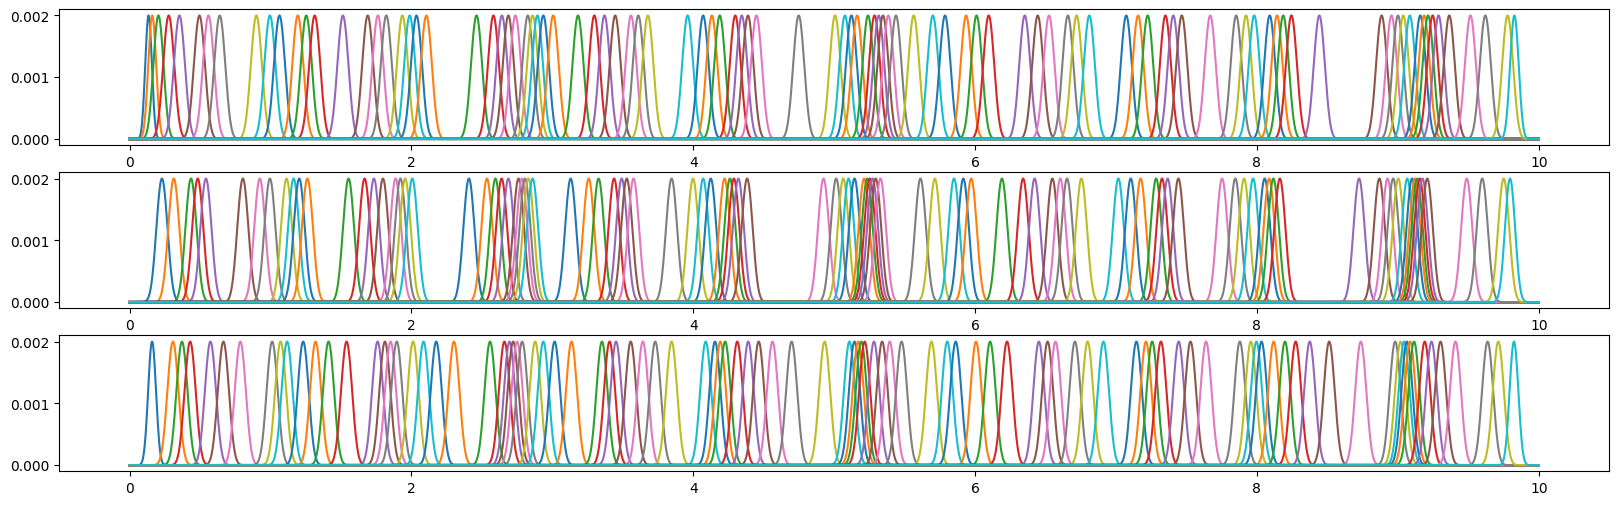

In [18]:
fig = plt.figure(figsize=(8, 6))
c = 1
n = x.shape[1]

for d in range(n):
    plt.subplot(n, 1, c)
    temp = np.floor(np.mean(ts_grids[d], 1)).astype(int)
    plt.scatter(np.take(t, temp), np.mean(
        x[:, d])*np.ones(ts_grids[d].shape)[:, 0], s=1, color='black')
    plt.plot(t, x[:, d])
    c = c + 1

fig = plt.figure(figsize=(20, 6))
c = 1
for d in range(n):
    plt.subplot(n, 1, c)
    plt.plot(t, mats[d][0].T)
    c = c + 1